In [12]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector

In [13]:
qc = QuantumCircuit(2)
qc.h(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ H ├
     └───┘

In [14]:
import numpy as np
from numpy import pi

In [15]:
qc.cp(pi/2, 0, 1)
qc.draw()

q_0: ──────■───────
     ┌───┐ │P(π/2) 
q_1: ┤ H ├─■───────
     └───┘

In [16]:
qc.h(0)
qc.swap(0,1)
qc.draw()


┌───┐   
q_0: ──────■───────┤ H ├─X─
     ┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ H ├─■─────────────X─
     └───┘

In [17]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

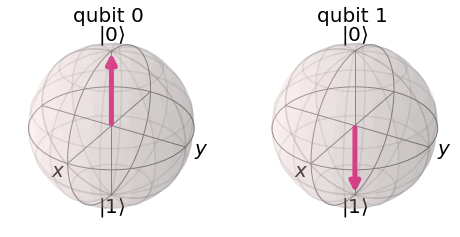

In [18]:
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init).result().get_statevector()
plot_bloch_multivector(statevector)

In [19]:
qc.h(1)
qc.cp(pi/2, 0, 1)
qc.h(0)
qc.swap(0,1)
qc.draw()




┌───┐   
q_0: ───────────■───────┤ H ├─X─
     ┌───┐┌───┐ │P(π/2) └───┘ │ 
q_1: ┤ X ├┤ H ├─■─────────────X─
     └───┘└───┘

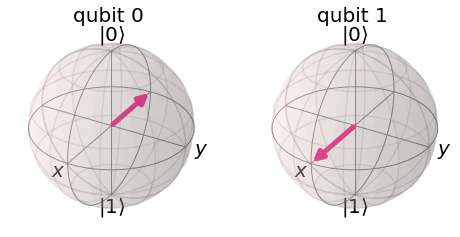

In [20]:
qc.save_statevector()
statevector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(statevector)

In [21]:
qc.swap(0,1)
qc.h(0)
qc.cp(-pi/2, 0, 1)
qc.h(1)
qc.draw()
#APPLYING QUANTUM FOURIER TRANSFORM.

┌───┐    ░    ┌───┐               
q_0: ───────────■───────┤ H ├─X──░──X─┤ H ├─■─────────────
     ┌───┐┌───┐ │P(π/2) └───┘ │  ░  │ └───┘ │P(-π/2) ┌───┐
q_1: ┤ X ├┤ H ├─■─────────────X──░──X───────■────────┤ H ├
     └───┘└───┘                  ░                   └───┘

In [22]:
qc.measure_all()
qc.draw()

┌───┐    ░    ┌───┐                ░ ┌─┐   
   q_0: ───────────■───────┤ H ├─X──░──X─┤ H ├─■──────────────░─┤M├───
        ┌───┐┌───┐ │P(π/2) └───┘ │  ░  │ └───┘ │P(-π/2) ┌───┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ H ├─■─────────────X──░──X───────■────────┤ H ├─░──╫─┤M├
        └───┘└───┘                  ░                   └───┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════════╩══╩═
                                                                 0  1

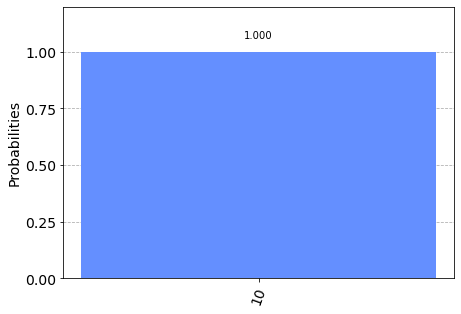

In [23]:
backend = Aer.get_backend('qasm_simulator') 
results = execute(qc, backend, shots = 1024).result()
count =results.get_counts()
plot_histogram(count)

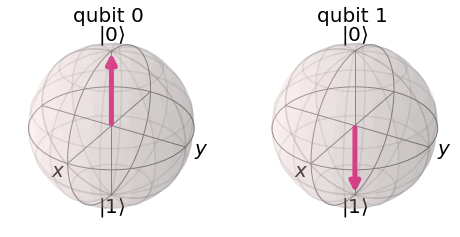

In [24]:
qc_init = qc.copy()
qc_init.save_statevector(label = 'sv2')
statevector = sim.run(qc_init).result().data()['sv2']
#statevector = statevectorobj.get_statevector()
plot_bloch_multivector(statevector)